In [1]:
import setup; import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from speech_pause_indicator import speech as original_speech

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



[2500]


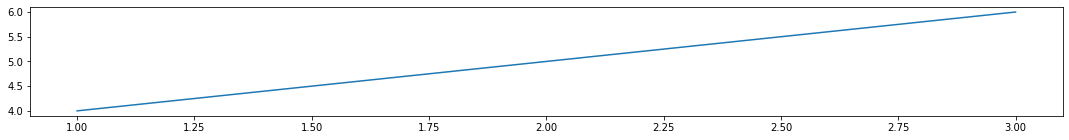

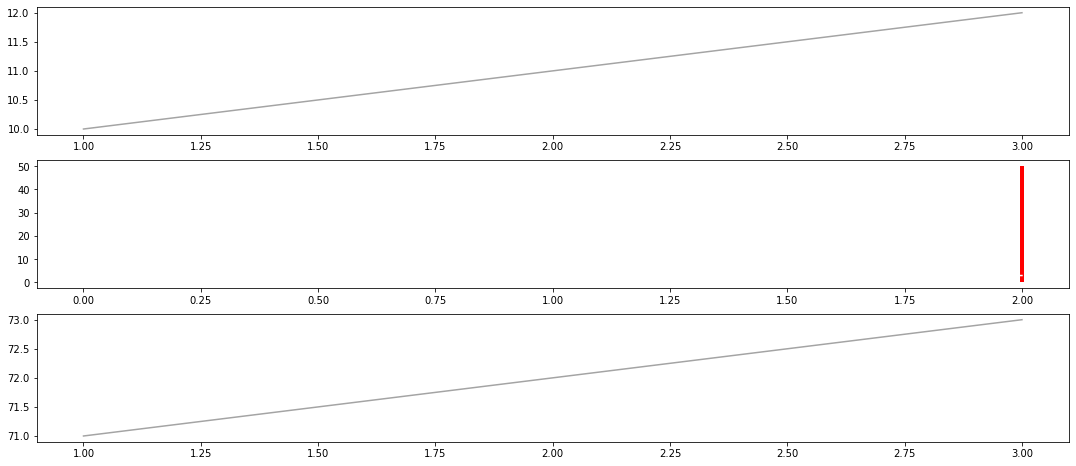

In [33]:
plt.figure(figsize=(18.5, 2))    
plt.plot([1, 2, 3], [4, 5, 6])

# Plot the rolling average and speech indicator function for the first sample
fig, (ax1, ax2, ax3) = plt.subplots(3, 1); fig.set_size_inches(18.5, 8)         

time1 = np.linspace(1, 3, num = 3)


# assume length is 5000
len1 = 5000

a = [10, 11, 12]
b = [71, 72, 73]
ax1.plot(time1, a, color = '#A4A4A4')
ax3.plot(time1, b, color = '#A4A4A4');
ax2.plot(time1, color = 'white')
    
# plot vertical lines for common segmentation
common_seg = [[2500, 2]]
to_plot = [i[0] for i in common_seg]
print(to_plot)
for k in range(len(to_plot)):
    if k % 2 == 0:
        c = 'red'
    else:
        c = 'green'
# to_plot[k]/len1*(time1[-1]-time1[0])+ time1[0]        
    ax2.vlines(to_plot[k]/len1*(time1[-1]-time1[0])+ time1[0], color = c, ymin=0, ymax=50, linewidth=4)    